### Clasificación desgaste de materiales

##### Fabio Martínez
##### Camilo Gonzalez
##### Cristian Viafara

##### Universidad Industrial de Santander

Primero: leer los datos de severo y moderado ubicados en dos diferentes carpetas. 

In [1]:
import numpy as np
import os
import sys
import tarfile
from skimage import io
import matplotlib.pyplot as plt

images_moderado = os.listdir('../IMAGENES/moderado')
images_severo = os.listdir('../IMAGENES/severo')

print len(images_severo)
print len(images_moderado)
print images_severo

36
29
['S31.jpg', 'S20.jpg', 'S7.jpg', 'S10.jpg', 'S36.jpg', 'S9.jpg', 'S15.jpg', 'S8.jpg', 'S21.jpg', 'S2.jpg', 'S29.jpg', 'S30.jpg', 'S5.jpg', 'S19.jpg', 'S34.jpg', 'S1.jpg', 'S28.jpg', 'S27.jpg', 'S35.jpg', 'S11.jpg', 'S6.jpg', 'S32.jpg', 'S22.jpg', 'S23.jpg', 'S18.jpg', 'S26.jpg', 'S16.jpg', 'S14.jpg', 'S12.jpg', 'S33.jpg', 'S4.jpg', 'S17.jpg', 'S24.jpg', 'S25.jpg', 'S13.jpg', 'S3.jpg']


### Algunos ejemplos visuales



In [3]:
import numpy as np
import random
def disp_samples_fmc(data_folders, sample_size):
    from skimage import io
    image_files = os.listdir(data_folders)
    image_sample = random.sample(image_files, sample_size)
    fig = plt.figure(figsize=(70,100))
    for i in range(len(image_sample)):
        ax=fig.add_subplot(5, 10, i+1)
        #print(image_sample[i])
        image_file = os.path.join(data_folders, image_sample[i])
        img = io.imread(image_file)
        plt.imshow(img,  cmap = plt.cm.Greys_r)


        

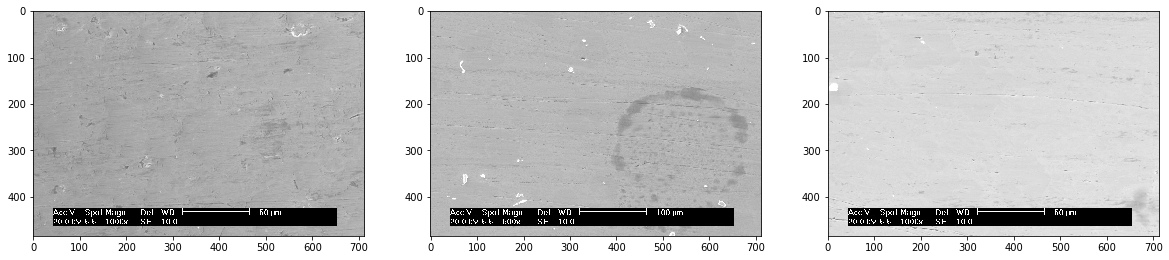

In [4]:
disp_samples_fmc('../IMAGENES/moderado',3)

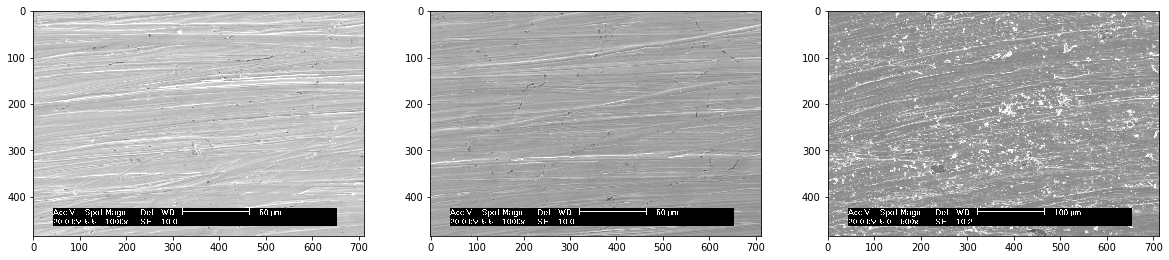

In [5]:
disp_samples_fmc('../IMAGENES/severo',3)

#  Cálculo del descriptor de HOG y etiquetas

In [6]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage.feature import hog
%matplotlib inline


X=[] # descriptor


#moderado
for image_path in images_moderado:
    image_file = os.path.join('../IMAGENES/moderado', image_path)
    image = color.rgb2gray(io.imread(image_file))
    fd = hog(image, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1))
    X.append(fd)
    #X = np.vstack(X,fd) 


#severo
for image_path in images_severo:
    image_file = os.path.join('../IMAGENES/severo', image_path)
    image = color.rgb2gray(io.imread(image_file))
    fd = hog(image, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1))
    X.append(fd)
    
X = np.r_[X]
y=[]

lab_mod = np.zeros(len(images_moderado)).astype(int).transpose()
lab_sev = np.ones(len(images_severo)).astype(int).transpose()
y = np.concatenate( (lab_mod, lab_sev), axis=0)
y = np.r_[y]
print "X.shape: ", X.shape, " y.shape: ", y.shape
print type(X)

/usr/local/lib/python2.7/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


X.shape:  (65, 10560)  y.shape:  (65,)
<type 'numpy.ndarray'>


In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage.feature import hog
%matplotlib inline

def disp_samples_fmc(data_folders, sample_size):
    from skimage import io
    for folder in data_folders:
        #print(folder)
        image_files = os.listdir(folder)
        image_sample = random.sample(image_files, sample_size)
        fig = plt.figure(figsize=(10,6))
        for i in range(len(image_sample)):
            ax=fig.add_subplot(5, 10, i+1)
            #print(image_sample[i])
            image_file = os.path.join(folder, image_sample[i])
            img = io.imread(image_file)
            plt.imshow(img,  cmap = plt.cm.Greys_r)

###### Datos en memoria y archivos de texto
se guarda en dos diferentes vectores. Los datos son escritos en un archivo de texto y también pueden estar disponibles en RAM

## Metodos de aprendizaje

#### Test inicial

In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

estimator_GNB = GaussianNB()
estimator_DTR =DecisionTreeClassifier()
estimator_SVC = SVC()
estimator_RFC =RandomForestClassifier()

estimator_GNB.fit(X,y)
estimator_DTR.fit(X,y)
estimator_SVC.fit(X,y)
estimator_RFC.fit(X,y)



predictions_GNB = estimator_GNB.predict(X)
predictions_DTR = estimator_DTR.predict(X)
predictions_SVC = estimator_SVC.predict(X)
predictions_RFC = estimator_RFC.predict(X)

In [ ]:
from sklearn.metrics import *
print "predictions_GNB %.3f"%accuracy_score(predictions_GNB, y)
print "predictions_DTR %.3f"%accuracy_score(predictions_DTR, y)
print "predictions_SVC %.3f"%accuracy_score(predictions_SVC, y)
print "predictions_RFC %.3f"%accuracy_score(predictions_RFC, y)




## By using cross validations score 

In [ ]:
from sklearn.model_selection import KFold

s_GNB = cross_val_score(estimator_GNB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print s_GNB
print "accuracy s_GNB %.3f (+/- %.5f)"%(np.mean(s_GNB), np.std(s_GNB))

s_DTR = cross_val_score(estimator_DTR, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print s_DTR
print "accuracy s_DTR %.3f (+/- %.5f)"%(np.mean(s_DTR), np.std(s_DTR))

s_SVC = cross_val_score(estimator_SVC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print s_SVC
print "accuracy s_SVC %.3f (+/- %.5f)"%(np.mean(s_SVC), np.std(s_SVC))

s_RFC = cross_val_score(estimator_RFC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print s_RFC
print "accuracy s_RFC %.3f (+/- %.5f)"%(np.mean(s_RFC), np.std(s_RFC))


In [ ]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,20)
    for nfolds in nfolds_range:
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        print nfolds, np.mean(s), np.std(s),
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

In [ ]:
show_curve(RandomForestClassifier())